# Trying to integrate using SnapATAC2 Harmony

In [1]:
# Python packages
import os
import seaborn as sns
import anndata as ad
import glob
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib_venn import venn2
import snapatac2 as snap

In [2]:
# List h5ads to integrate
results_paths = ["/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe"]

In [5]:
# List h5ads to integrate
h5ad_paths = []
for results_path in results_paths:
    h5ad_paths += sorted(glob.glob(os.path.join(results_path, "*", "annotate", "publication", "*.h5ad"))) # snapatac2
len(h5ad_paths), h5ad_paths

(5,
 ['/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe/MM129/annotate/publication/annotated.h5ad',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe/MM157/annotate/publication/annotated.h5ad',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe/MM166/annotate/publication/annotated.h5ad',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe/MM168/annotate/publication/annotated.h5ad',
  '/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe/MM290/annotate/publication/annotated.h5ad'])

# Load and concatenate the data

In [7]:
# Read in samples
adata_list = []
samples = []
for h5ad_path in h5ad_paths:
    sample = h5ad_path.split("/")[-4]  # snapatac2
    print(f"Reading {sample}")
    adata = sc.read_h5ad(h5ad_path)
    adata.obs.index = sample + "_" + adata.obs.index
    adata.obs.index = adata.obs.index.str.replace("-1", "")  # Needed this for this case
    adata_cp = sc.AnnData(adata.X.copy(), obs=adata.obs.copy(), var=adata.var.copy())
    adata_list.append(adata_cp)
    samples.append(sample)
samples

Reading MM129
Reading MM157
Reading MM166
Reading MM168
Reading MM290


['MM129', 'MM157', 'MM166', 'MM168', 'MM290']

In [9]:
# Concat samples
adata_concat = ad.concat(adata_list, label="sample", keys=samples)
adata_concat.obs["sample"].value_counts()

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):


sample
MM157    26104
MM129    12537
MM166     7775
MM168     5022
MM290     4900
Name: count, dtype: int64

# Get embedding

In [10]:
# Select features
snap.pp.select_features(adata_concat, n_features=50000)

2023-10-28 13:59:02 - INFO - Selected 50000 features.


In [11]:
# Run spectral embedding
snap.tl.spectral(adata_concat)

In [12]:
# Run UMAP on top of spectral embedding
snap.tl.umap(adata_concat)

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# Store the umap from snapatac2
adata_concat.obsm["X_umap_snap"] = adata_concat.obsm["X_umap"]

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/minicon

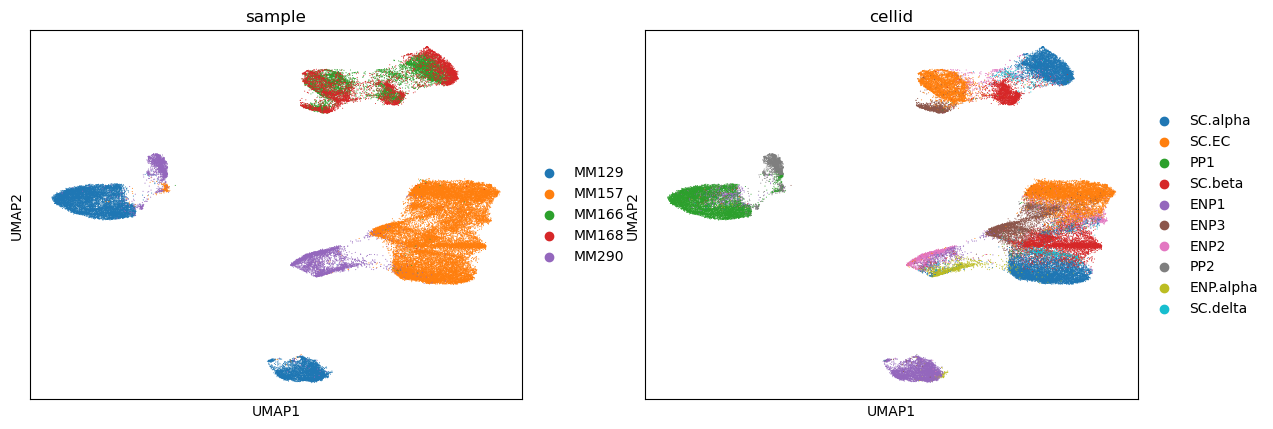

In [13]:
# Plot the sample
sc.pl.umap(adata_concat, color=["sample", "cellid"])

In [14]:
sc.pp.neighbors(adata_concat, n_neighbors=30, use_rep="X_spectral")

In [15]:
sc.tl.umap(adata_concat, min_dist=0.3, random_state=1234)

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/minicon

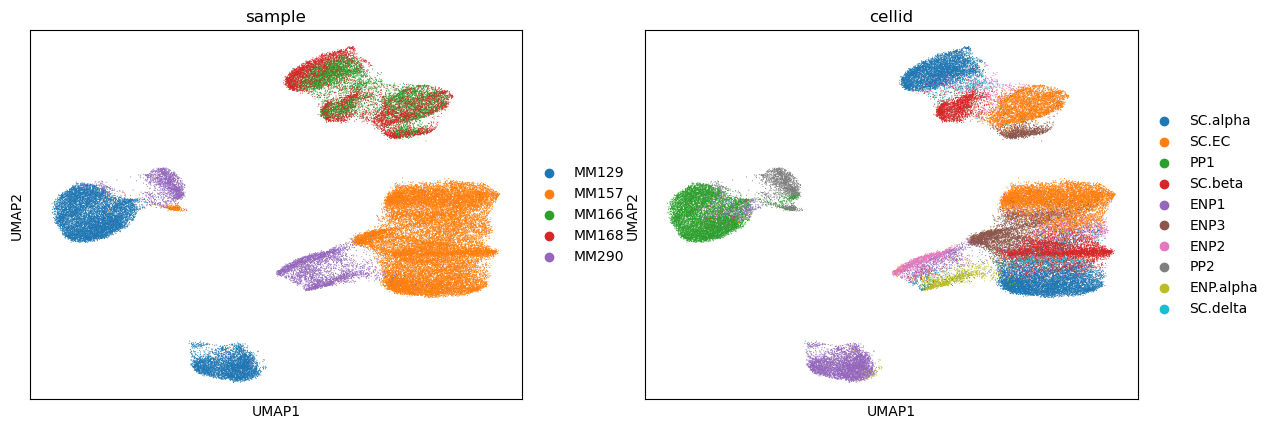

In [16]:
# Plot the sample
sc.pl.umap(adata_concat, color=["sample", "cellid"])

In [17]:
# Store the umap from scanpy
adata_concat.obsm["X_umap_scanpy"] = adata_concat.obsm["X_umap"]

In [18]:
adata_concat

AnnData object with n_obs × n_vars = 56338 × 606219
    obs: 'tsse', 'n_fragment', 'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score', 'leiden_1', 'cellid', 'sample'
    var: 'count', 'selected'
    uns: 'spectral_eigenvalue', 'sample_colors', 'cellid_colors', 'neighbors', 'umap'
    obsm: 'X_spectral', 'X_umap', 'X_umap_scanpy'
    obsp: 'distances', 'connectivities'

# Batch correct

In [19]:
# Run Harmony on spectal embedding
snap.pp.harmony(adata_concat, batch="sample", max_iter_harmony=20)

2023-10-28 14:05:24,083 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-10-28 14:05:24 - INFO - Computing initial centroids with sklearn.KMeans...
2023-10-28 14:05:37,724 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-10-28 14:05:37 - INFO - sklearn.KMeans initialization complete.
2023-10-28 14:05:38,027 - harmonypy - INFO - Iteration 1 of 20
2023-10-28 14:05:38 - INFO - Iteration 1 of 20
2023-10-28 14:05:49,743 - harmonypy - INFO - Iteration 2 of 20
2023-10-28 14:05:49 - INFO - Iteration 2 of 20
2023-10-28 14:05:53,054 - harmonypy - INFO - Iteration 3 of 20
2023-10-28 14:05:53 - INFO - Iteration 3 of 20
2023-10-28 14:05:56,408 - harmonypy - INFO - Converged after 3 iterations
2023-10-28 14:05:56 - INFO - Converged after 3 iterations


In [20]:
# UMAP on top of Harmony
snap.tl.umap(adata_concat, use_rep="X_spectral_harmony")

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/minicon

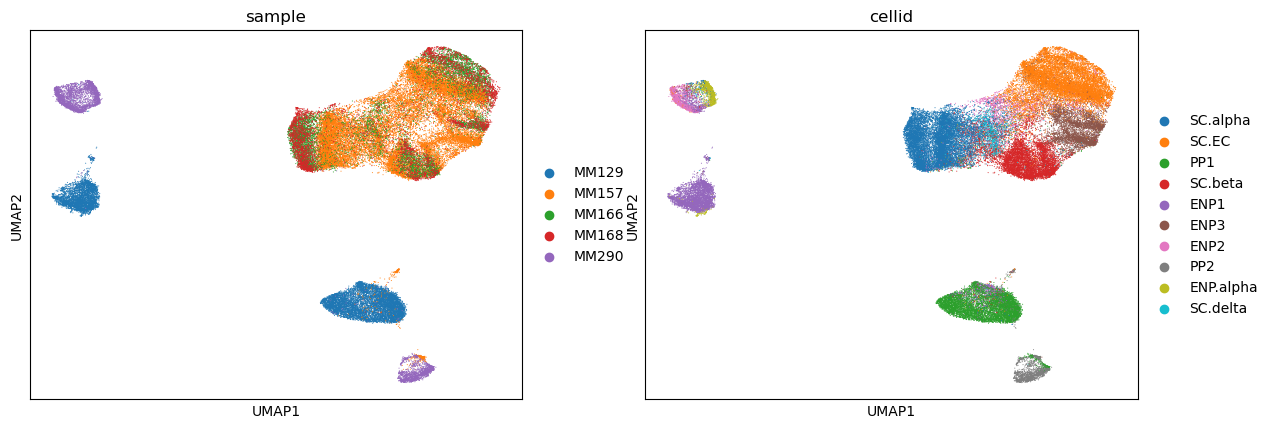

In [21]:
# Plot it
sc.pl.umap(adata_concat, color=["sample", "cellid"])

# MNN correct

In [23]:
# correct batch effect
snap.pp.mnc_correct(adata_concat, batch="sample")

In [25]:
# Another UMAP
snap.tl.umap(adata_concat, use_rep="X_spectral_mnn")

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/cellar/users/aklie/opt/minicon

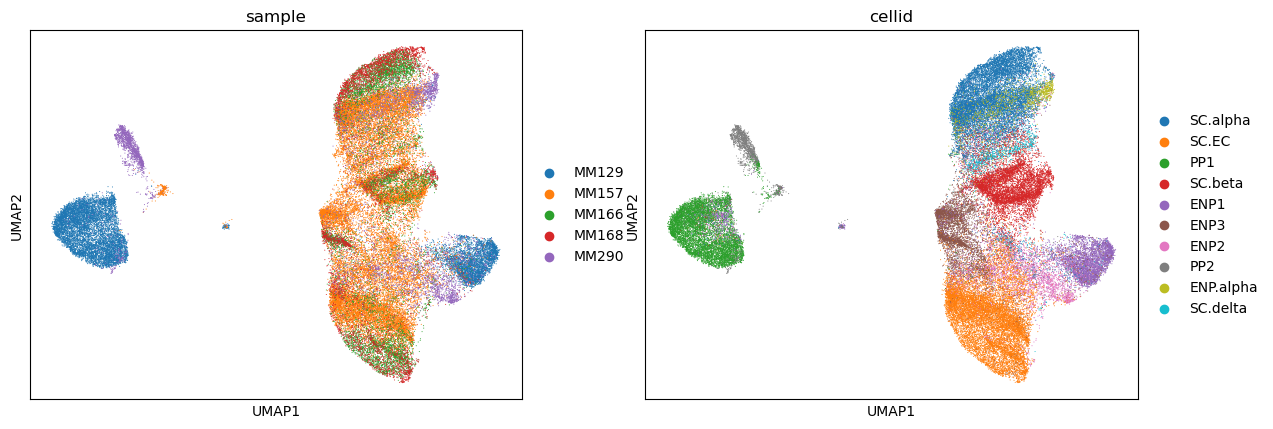

In [26]:
# Plot it
sc.pl.umap(adata_concat, color=["sample", "cellid"])

# DONE!

---